### Group Project (C3)

In [1]:
# Loading in the data set
flightdata = read.csv("/home/jupyter/STAT 306/STAT-306-Project/data/flights.csv")
head(flightdata)

,X,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<int>
1,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
2,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
3,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
4,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
5,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
6,5,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5955


In [2]:
# Removing unnecessary columns: "X" and "flight"
flightdata = flightdata[, 2:12]
flightdata = subset(flightdata, select = -flight)

In [3]:
# Check the number of rows and columns in the data frame
num_rows = nrow(flightdata)
num_rows
num_cols = ncol(flightdata)
num_cols

[1] 300153

[1] 10

In [4]:
# Available column names 
colnames(flightdata)

[1] "airline"          "source_city"      "departure_time"   "stops"           
 [5] "arrival_time"     "destination_city" "class"            "duration"        
 [9] "days_left"        "price"

In [5]:
# 1: Fitting a model with price as the response variable
#    and the rest 9 columns as the explanatory variables
full_model = lm(price ~ ., data = flightdata)

# Print a summary of the full model
summary(full_model)


Call:
lm(formula = price ~ ., data = flightdata)

Residuals:
   Min     1Q Median     3Q    Max 
-36294  -3124   -390   3116  64223 

Coefficients:
                              Estimate Std. Error   t value Pr(>|t|)    
(Intercept)                  5.268e+04  8.299e+01   634.818  < 2e-16 ***
airlineAirAsia              -1.164e+02  6.296e+01    -1.849   0.0645 .  
airlineGO_FIRST              1.589e+03  5.456e+01    29.127  < 2e-16 ***
airlineIndigo                1.991e+03  4.727e+01    42.118  < 2e-16 ***
airlineSpiceJet              2.178e+03  7.705e+01    28.263  < 2e-16 ***
airlineVistara               3.955e+03  3.111e+01   127.143  < 2e-16 ***
source_cityChennai          -6.748e+01  4.627e+01    -1.458   0.1448    
source_cityDelhi            -1.406e+03  4.201e+01   -33.465  < 2e-16 ***
source_cityHyderabad        -1.679e+03  4.591e+01   -36.569  < 2e-16 ***
source_cityKolkata           1.584e+03  4.447e+01    35.609  < 2e-16 ***
source_cityMumbai           -2.119e+02  4.183e+0

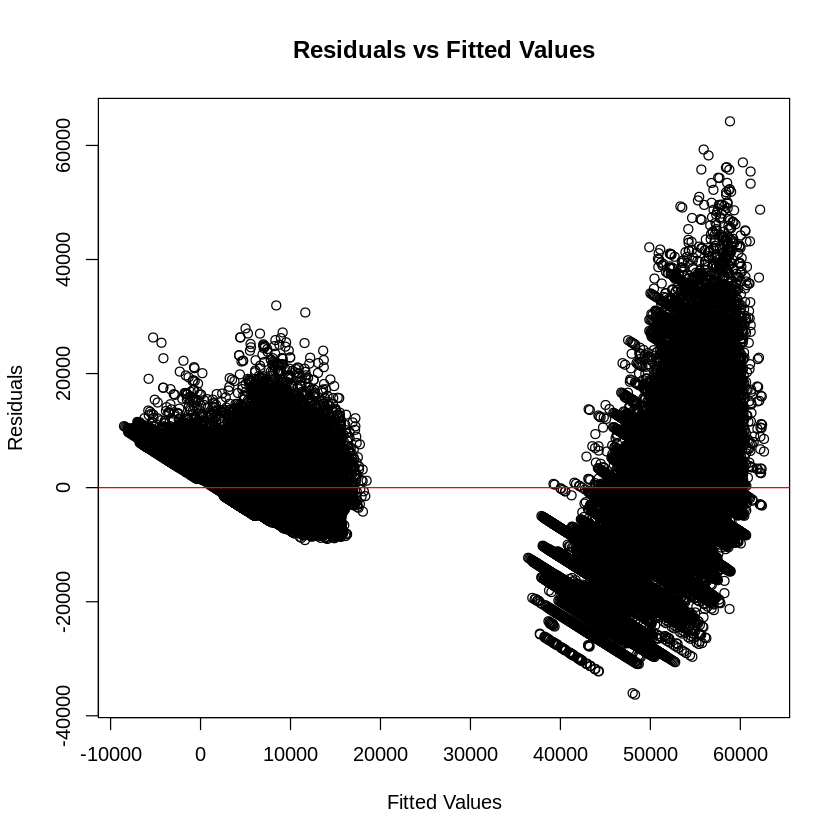

In [6]:
# Plot the residuals from the full model
residuals_full = residuals(full_model)
expected_vals = full_model$fitted.values

plot(expected_vals, residuals_full, 
     xlab = "Fitted Values", ylab = "Residuals")
title("Residuals vs Fitted Values")
abline(h = 0, col = "red")

In [7]:
# 2: Using a smaller data set size to fit the full model
set.seed(0)
sample_1000 = flightdata[sample(nrow(flightdata), 1000, replace = TRUE), ]

# Repeat all the steps in 1
# Fit a model on sample, print summary, and plot 
sample_full_model = lm(price ~ . , data = sample_1000)
summary(sample_full_model)


Call:
lm(formula = price ~ ., data = sample_1000)

Residuals:
   Min     1Q Median     3Q    Max 
-27774  -3349   -355   3144  42778 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  50975.37    1527.13  33.380  < 2e-16 ***
airlineAirAsia                 452.60    1154.71   0.392  0.69517    
airlineGO_FIRST               1807.19     977.27   1.849  0.06473 .  
airlineIndigo                 3112.41     869.32   3.580  0.00036 ***
airlineSpiceJet                683.19    1418.18   0.482  0.63010    
airlineVistara                4342.10     570.55   7.610 6.47e-14 ***
source_cityChennai             755.49     811.46   0.931  0.35207    
source_cityDelhi              -525.06     749.51  -0.701  0.48376    
source_cityHyderabad            24.88     845.59   0.029  0.97653    
source_cityKolkata            1895.24     800.73   2.367  0.01813 *  
source_cityMumbai              842.59     783.86   1.075  0.28267    
departure_

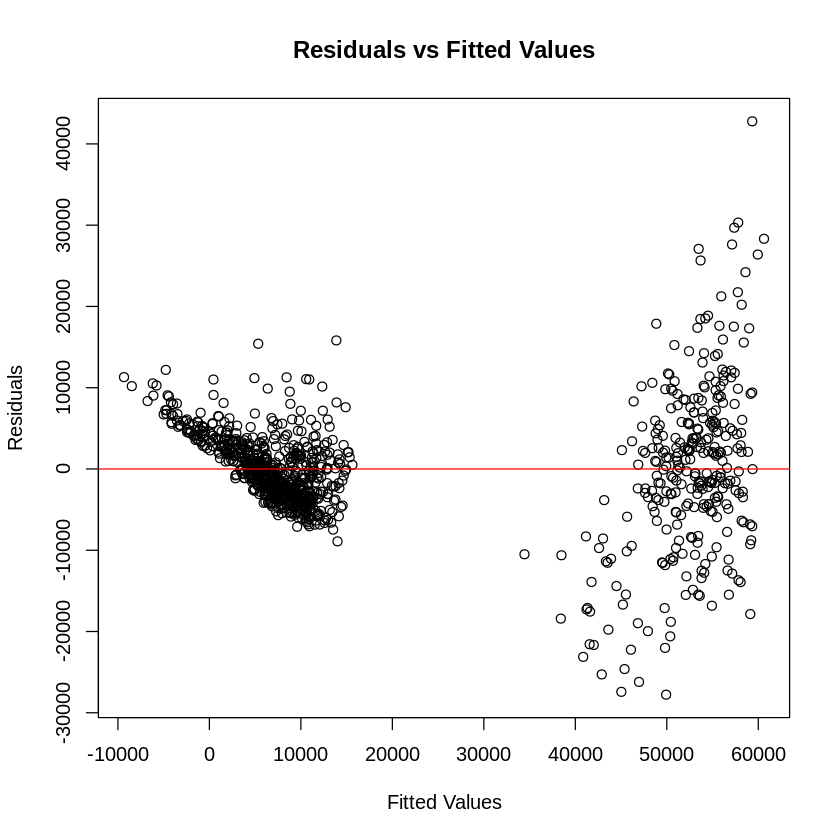

In [8]:
# Plot the residuals from the full model
sample_residuals_full = residuals(sample_full_model)
sample_expected_vals = sample_full_model$fitted.values

plot(sample_expected_vals, sample_residuals_full, 
     xlab = "Fitted Values", ylab = "Residuals")
title("Residuals vs Fitted Values")
abline(h = 0, col = "red")

In [9]:
# 3: Filtering for airline
airlines <- unique(flightdata$airline)
print(airlines)

[1] "SpiceJet"  "AirAsia"   "Vistara"   "GO_FIRST"  "Indigo"    "Air_India"


In [10]:
# Airline 1: SpiceJet 
airline_SpiceJet = flightdata[flightdata$airline == "SpiceJet",]
unique(airline_SpiceJet$airline)
colnames(airline_SpiceJet)
head(airline_SpiceJet)

# no 'class' variable
unique(airline_SpiceJet$class)
# From EDA, we know SpiceJet only has Economy tickets in this data
# cannot use 'class' variable as explanatory variables

[1] "SpiceJet"

[1] "airline"          "source_city"      "departure_time"   "stops"           
 [5] "arrival_time"     "destination_city" "class"            "duration"        
 [9] "days_left"        "price"

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<int>
1,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
2,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
29,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.33,1,10260
39,SpiceJet,Delhi,Evening,one,Night,Mumbai,Economy,4.50,1,12123
40,SpiceJet,Delhi,Evening,one,Morning,Mumbai,Economy,15.25,1,12123
46,SpiceJet,Delhi,Evening,one,Afternoon,Mumbai,Economy,19.58,1,12230


[1] "Economy"

In [11]:
SpiceJet_model = lm(price ~ source_city + departure_time + stops + arrival_time 
                    + destination_city + duration + days_left, data = airline_SpiceJet)

summary(SpiceJet_model)


Call:
lm(formula = price ~ source_city + departure_time + stops + arrival_time + 
    destination_city + duration + days_left, data = airline_SpiceJet)

Residuals:
    Min      1Q  Median      3Q     Max 
-5621.8 -1528.8  -295.4   883.8 25385.1 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  9600.620    181.716  52.833  < 2e-16 ***
source_cityChennai           -590.289    104.027  -5.674 1.44e-08 ***
source_cityDelhi              303.821    103.223   2.943  0.00326 ** 
source_cityHyderabad         -385.481    161.424  -2.388  0.01696 *  
source_cityKolkata            910.507    104.529   8.711  < 2e-16 ***
source_cityMumbai              11.808    102.591   0.115  0.90837    
departure_timeEarly_Morning  -885.851     94.503  -9.374  < 2e-16 ***
departure_timeEvening       -1302.049     98.869 -13.169  < 2e-16 ***
departure_timeMorning        -544.970     98.368  -5.540 3.11e-08 ***
departure_timeNight         -1294.403 

In [12]:
# Airline 2: AirAsia 
airline_AirAsia = flightdata[flightdata$airline == "AirAsia",]
unique(airline_AirAsia$airline)

colnames(airline_AirAsia)
head(airline_AirAsia)

# no 'class' variable
unique(airline_AirAsia$class)
# From EDA, we know AirAsia only has Economy tickets in this data
# cannot use 'class' variable as explanatory variables

[1] "AirAsia"

[1] "airline"          "source_city"      "departure_time"   "stops"           
 [5] "arrival_time"     "destination_city" "class"            "duration"        
 [9] "days_left"        "price"

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<int>
3,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
19,AirAsia,Delhi,Evening,one,Early_Morning,Mumbai,Economy,12.25,1,5949
20,AirAsia,Delhi,Evening,one,Morning,Mumbai,Economy,16.33,1,5949
28,AirAsia,Delhi,Morning,one,Afternoon,Mumbai,Economy,5.83,1,8869
49,AirAsia,Delhi,Evening,one,Early_Morning,Mumbai,Economy,15.17,1,12539
142,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,2,5956


[1] "Economy"

In [13]:
AirAsia_model = lm(price ~ source_city + departure_time + stops + arrival_time 
                    + destination_city + duration + days_left, data = airline_AirAsia)

summary(AirAsia_model)


Call:
lm(formula = price ~ source_city + departure_time + stops + arrival_time + 
    destination_city + duration + days_left, data = airline_AirAsia)

Residuals:
    Min      1Q  Median      3Q     Max 
-4140.9 -1345.9  -256.6   794.8 24973.4 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 7241.780    110.868  65.319  < 2e-16 ***
source_cityChennai          -739.853     76.318  -9.694  < 2e-16 ***
source_cityDelhi             511.203     63.249   8.082 6.80e-16 ***
source_cityHyderabad        -710.856     70.874 -10.030  < 2e-16 ***
source_cityKolkata           423.260     65.668   6.445 1.19e-10 ***
source_cityMumbai           -407.628     68.843  -5.921 3.26e-09 ***
departure_timeEarly_Morning   15.540     62.767   0.248 0.804458    
departure_timeEvening       -171.294     61.144  -2.801 0.005093 ** 
departure_timeLate_Night     419.405    207.765   2.019 0.043540 *  
departure_timeMorning       -335.613     68.383  

In [14]:
# Airline 3: Vistara 
airline_Vistara = flightdata[flightdata$airline == "Vistara",]
unique(airline_Vistara$airline)

colnames(airline_Vistara)
head(airline_Vistara)

# can use 'class' variable
unique(airline_Vistara$class)
# From EDA, we know Vistara has both Economy and Business tickets in this data
# can still use 'class' variable as explanatory variables

[1] "Vistara"

[1] "airline"          "source_city"      "departure_time"   "stops"           
 [5] "arrival_time"     "destination_city" "class"            "duration"        
 [9] "days_left"        "price"

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<int>
4,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
5,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
6,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5955
7,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1,6060
8,Vistara,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.17,1,6060
26,Vistara,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.17,1,6690


[1] "Economy"  "Business"

In [15]:
Vistara_model = lm(price ~ source_city + departure_time + stops + arrival_time 
                   + destination_city + class + duration + days_left, data = airline_Vistara)

summary(Vistara_model)


Call:
lm(formula = price ~ source_city + departure_time + stops + arrival_time + 
    destination_city + class + duration + days_left, data = airline_Vistara)

Residuals:
   Min     1Q Median     3Q    Max 
-31229  -4059   -658   3431  59963 

Coefficients:
                              Estimate Std. Error   t value Pr(>|t|)    
(Intercept)                  57471.275    144.821   396.844  < 2e-16 ***
source_cityChennai             695.323     80.924     8.592  < 2e-16 ***
source_cityDelhi               124.371     76.448     1.627    0.104    
source_cityHyderabad         -1466.702     80.694   -18.176  < 2e-16 ***
source_cityKolkata            3499.790     80.311    43.578  < 2e-16 ***
source_cityMumbai             1846.662     74.109    24.918  < 2e-16 ***
departure_timeEarly_Morning   1138.626     79.045    14.405  < 2e-16 ***
departure_timeEvening         1972.262     81.225    24.281  < 2e-16 ***
departure_timeMorning         1204.032     74.724    16.113  < 2e-16 ***
departure_t

In [16]:
# Airline 4: GO_FIRST 
airline_GO_FIRST = flightdata[flightdata$airline == "GO_FIRST",]
unique(airline_GO_FIRST$airline)

colnames(airline_GO_FIRST)
head(airline_GO_FIRST)

# cannot use 'class' variable
unique(airline_GO_FIRST$class)
# From EDA, we know GO_FIRST has only Economy tickets in this data
# cannot  use 'class' variable as an explanatory variable

[1] "GO_FIRST"

[1] "airline"          "source_city"      "departure_time"   "stops"           
 [5] "arrival_time"     "destination_city" "class"            "duration"        
 [9] "days_left"        "price"

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<int>
9,GO_FIRST,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.17,1,5954
10,GO_FIRST,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.25,1,5954
11,GO_FIRST,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.25,1,5954
12,GO_FIRST,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5954
21,GO_FIRST,Delhi,Early_Morning,one,Evening,Mumbai,Economy,11.75,1,5954
22,GO_FIRST,Delhi,Early_Morning,one,Night,Mumbai,Economy,14.50,1,5954


[1] "Economy"

In [17]:
GO_FIRST_model = lm(price ~ source_city + departure_time + stops + arrival_time 
                   + destination_city + duration + days_left, data = airline_GO_FIRST)

summary(GO_FIRST_model)


Call:
lm(formula = price ~ source_city + departure_time + stops + arrival_time + 
    destination_city + duration + days_left, data = airline_GO_FIRST)

Residuals:
    Min      1Q  Median      3Q     Max 
-4076.1 -1247.4  -429.7   675.0 26074.3 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  6877.804     85.349  80.584  < 2e-16 ***
source_cityChennai             26.560     69.580   0.382 0.702672    
source_cityDelhi              377.989     45.327   8.339  < 2e-16 ***
source_cityHyderabad         -627.022     54.594 -11.485  < 2e-16 ***
source_cityKolkata           1298.544     49.765  26.094  < 2e-16 ***
source_cityMumbai             147.943     45.288   3.267 0.001090 ** 
departure_timeEarly_Morning   153.174     45.777   3.346 0.000821 ***
departure_timeEvening        -101.350     46.471  -2.181 0.029198 *  
departure_timeLate_Night     -482.567    183.693  -2.627 0.008619 ** 
departure_timeMorning         893.219 

In [18]:
# Airline 5: Indigo 
airline_Indigo = flightdata[flightdata$airline == "Indigo",]
unique(airline_Indigo$airline)

colnames(airline_Indigo)
head(airline_Indigo)

# cannot use 'class' variable
unique(airline_Indigo$class)
# From EDA, we know GO_FIRST has only Economy tickets in this data
# cannot  use 'class' variable as an explanatory variable

[1] "Indigo"

[1] "airline"          "source_city"      "departure_time"   "stops"           
 [5] "arrival_time"     "destination_city" "class"            "duration"        
 [9] "days_left"        "price"

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<int>
13,Indigo,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.17,1,5955
14,Indigo,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.17,1,5955
15,Indigo,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.25,1,5955
16,Indigo,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
25,Indigo,Delhi,Morning,zero,Morning,Mumbai,Economy,2.50,1,6165
27,Indigo,Delhi,Evening,zero,Evening,Mumbai,Economy,2.17,1,6585


[1] "Economy"

In [19]:
Indigo_model = lm(price ~ source_city + departure_time + stops + arrival_time 
                    + destination_city + duration + days_left, data = airline_Indigo)

summary(Indigo_model)


Call:
lm(formula = price ~ source_city + departure_time + stops + arrival_time + 
    destination_city + duration + days_left, data = airline_Indigo)

Residuals:
    Min      1Q  Median      3Q     Max 
-5903.3 -1491.6  -346.5  1000.2 21865.6 

Coefficients:
                             Estimate Std. Error  t value Pr(>|t|)    
(Intercept)                 8146.8524    78.0433  104.389  < 2e-16 ***
source_cityChennai          -507.9438    40.1312  -12.657  < 2e-16 ***
source_cityDelhi             445.5017    40.0858   11.114  < 2e-16 ***
source_cityHyderabad        -256.1034    42.3892   -6.042 1.54e-09 ***
source_cityKolkata          1245.0477    40.7105   30.583  < 2e-16 ***
source_cityMumbai            468.4433    41.5285   11.280  < 2e-16 ***
departure_timeEarly_Morning    8.8847    46.0498    0.193 0.847010    
departure_timeEvening       -294.5084    37.5874   -7.835 4.78e-15 ***
departure_timeLate_Night    -483.3461    97.7879   -4.943 7.73e-07 ***
departure_timeMorning        1

In [20]:
# Airline 6: Air_India 
airline_Air_India = flightdata[flightdata$airline == "Air_India",]
unique(airline_Air_India$airline)

colnames(airline_Air_India)
head(airline_Air_India)

# can use 'class' variable
unique(airline_Air_India$class)
# From EDA, we know Air_India has both Economy and business tickets in this data
# can  use 'class' variable as an explanatory variable

[1] "Air_India"

[1] "airline"          "source_city"      "departure_time"   "stops"           
 [5] "arrival_time"     "destination_city" "class"            "duration"        
 [9] "days_left"        "price"

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<int>
17,Air_India,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.08,1,5955
18,Air_India,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.17,1,5955
24,Air_India,Delhi,Evening,one,Night,Mumbai,Economy,3.75,1,5955
38,Air_India,Delhi,Early_Morning,one,Afternoon,Mumbai,Economy,8.83,1,11900
41,Air_India,Delhi,Night,one,Morning,Mumbai,Economy,11.00,1,12150
42,Air_India,Delhi,Afternoon,one,Morning,Mumbai,Economy,19.08,1,12150


[1] "Economy"  "Business"

In [1]:
Air_India_model = lm(price ~ source_city + departure_time + stops + arrival_time 
                  + destination_city + class + duration + days_left, data = airline_Air_India)

summary(Air_India_model)

ERROR: Error in eval(mf, parent.frame()): object 'airline_Air_India' not found


In [ ]:
airlines <- unique(flightdata$airline)

In [ ]:
print(airlines)
model_summaries <- list()

model_summaries[["SpiceJet"]] <- summary(SpiceJet_model)
model_summaries[["AirAsia"]] <- summary(AirAsia_model)
model_summaries[["Vistara"]] <- summary(Vistara_model)
model_summaries[["GO_FIRST"]] <- summary(GO_FIRST_model)
model_summaries[["Indigo"]] <- summary(Indigo_model)
model_summaries[["Air_India"]] <- summary(Air_India_model)